2022-07-19 <br/>
Technology Adoption <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-07-19

Advanced subplots - Completed

https://plotly.com/python/mixed-subplots/ 

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-19/technology.csv")

In [3]:
#Special thanks to lukes for providing the complete ISO values (Didn't use it in this project, but good to have)

country_vals = pd.read_csv("https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv")

In [4]:
df.head()

,variable,label,iso3c,year,group,category,value
0,BCG,% children who received a BCG immunization,AFG,1982,Consumption,Vaccines,10.0
1,BCG,% children who received a BCG immunization,AFG,1983,Consumption,Vaccines,10.0
2,BCG,% children who received a BCG immunization,AFG,1984,Consumption,Vaccines,11.0
3,BCG,% children who received a BCG immunization,AFG,1985,Consumption,Vaccines,17.0
4,BCG,% children who received a BCG immunization,AFG,1986,Consumption,Vaccines,18.0


In [5]:
df.label.value_counts()

Fixed telephone subscriptions                                     18440
Geographical/route lengths of line open at the end of the year    12324
Gross output of electric energy (TWH)                             12140
Land agricultural land area 1000 ha                               11945
Aluminum primary production, in metric tons                       11736
                                                                  ...  
Breast conservation surgeries                                        64
% Cholecystectomies without a hospital stay                          64
Cholecystectomies (gallbladder removals) laparoscopically            57
% Laparoscopic cholecystectomies without a hospital stay             46
Coronary stenting procedures                                         44
Name: label, Length: 194, dtype: int64

In [6]:
df.group.value_counts()

Production     249244
Consumption    173490
Non-Tech        65303
Creation         3599
Name: group, dtype: int64

In [7]:
df.category.value_counts()

Agriculture                    120282
Transport                      112845
Communications                  70858
Energy                          66748
Vaccines                        60863
Industry                        26467
Hospital (non-drug medical)     14677
Other                           12292
Financial                        6604
Name: category, dtype: int64

In [8]:
df[df.group == "Production"].category.value_counts()

Transport         85591
Energy            66748
Agriculture       66069
Industry          26467
Communications     2333
Other              2036
Name: category, dtype: int64

In [9]:
# Focus on one graph: group = Production & category = Transport     

df_val = df[(df.group == "Production") & (df.category == "Transport")].reset_index()    

In [10]:
df_val.head()

,index,variable,label,iso3c,year,group,category,value
0,94078,aviation_pass,"Air transport, passengers carried",ABW,2017,Production,Transport,223502.0
1,94079,aviation_pass,"Air transport, passengers carried",ABW,2018,Production,Transport,274280.0
2,94080,aviation_pass,"Air transport, passengers carried",AFG,1970,Production,Transport,84700.0
3,94081,aviation_pass,"Air transport, passengers carried",AFG,1971,Production,Transport,97400.0
4,94082,aviation_pass,"Air transport, passengers carried",AFG,1972,Production,Transport,104900.0


In [11]:
df_val.label.value_counts()

Geographical/route lengths of line open at the end of the year                            12324
Civil aviation ton-KM of cargo carried                                                     8477
Freight carried on railways (excluding livestock and passenger baggage) (ton-km)           8290
Commercial vehicles (bus, taxi)                                                            7851
Metric tons of freight carried on railways (excluding livestock and passenger baggage)     7712
Air transport, passengers carried                                                          7470
Tonnage of ships of all kinds                                                              5007
Ships of all kinds                                                                         4868
Length of Paved Road (km)                                                                  4558
Civil aviation passenger-KM traveled                                                       4386
Tonnage of steam and motor ships        

In [12]:
# Take 1 label: Air transport, passengers carried 
df_red = df_val[df_val.label == "Air transport, passengers carried"]

In [13]:
# Setting up the geomap
fig = go.Figure()
fig.add_trace(
    go.Scattergeo(
                  locations=df_red['iso3c'],
                  mode="markers",
                  hoverinfo="text",
                  showlegend=False,
                  marker=dict(color="crimson", size=4, opacity=0.8))
)
fig.show()

In [14]:
# Getting the top 10 countires by median
freq = df_red.groupby(['iso3c'])["value"].median().sort_values(ascending=False)[:10].reset_index().rename(columns={"index": "x"})
freq

,iso3c,value
0,USA,514924000.0
1,JPN,83913504.0
2,GBR,55475500.0
3,CHN,52277000.0
4,FRA,36020400.0
5,RUS,35263422.0
6,DEU,32465300.0
7,KOR,27109000.0
8,AUS,26929300.0
9,ESP,25765700.0


In [15]:
# Getting the median values by year for the top 10 countries
df_red[df_red.iso3c.isin(freq.iso3c)].groupby(["year"])["value"].median().reset_index()[:10]

,year,value
0,1970,8213350.0
1,1971,8537300.0
2,1972,9970000.0
3,1973,10960750.0
4,1974,10664700.0
5,1975,11055100.0
6,1976,11801100.0
7,1977,13328200.0
8,1978,15369000.0
9,1979,15683000.0


In [16]:
df_red.label[0]

'Air transport, passengers carried'

In [17]:
from turtle import color
from matplotlib.pyplot import title
import plotly.graph_objects as go
from plotly.subplots import make_subplots




# frequency of Country (Pulling top 10 - Median)
freq = df_red.groupby(['iso3c'])["value"].median().sort_values(ascending=False)[:10].reset_index().rename(columns={"index": "x"})

# Median Timelapse of the top 10 Countires 
df_v = df_red[df_red.iso3c.isin(freq.iso3c)].groupby(["year"])["value"].median().reset_index()

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    
    row_heights=[0.4, 0.6],
    
    specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "scatter"}]],
    subplot_titles=["Global Scale", "Top 10 median countries",  "Median trend of the top 10 countires"],
    )

# Add scattergeo globe map
fig.add_trace(
    go.Scattergeo(
                  locations=df_red['iso3c'],
                  mode="markers",
                  hoverinfo="text",
                  showlegend=False,
                  marker=dict(color="crimson", size=4, opacity=0.8)),
                  
    row=1, col=1
)

# Add locations bar chart
fig.add_trace(
    go.Bar(x=freq["iso3c"][0:10],y=freq["value"][0:10], marker=dict(color="crimson"), showlegend=False),
    row=1, col=2,
)

# Trendline
fig.add_trace(
    go.Scatter(x=df_v["year"], y=df_v["value"], mode= "lines", showlegend=False),
    row=2, col=2
)

# Update geo subplot properties
fig.update_geos(
    projection_type="orthographic",
    landcolor="white",
    oceancolor="MidnightBlue",
    showocean=True,
    lakecolor="LightBlue",
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and title in layout
fig.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=60, b=40, l=20),
    title = {'text': df_red.label[0],
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.show()

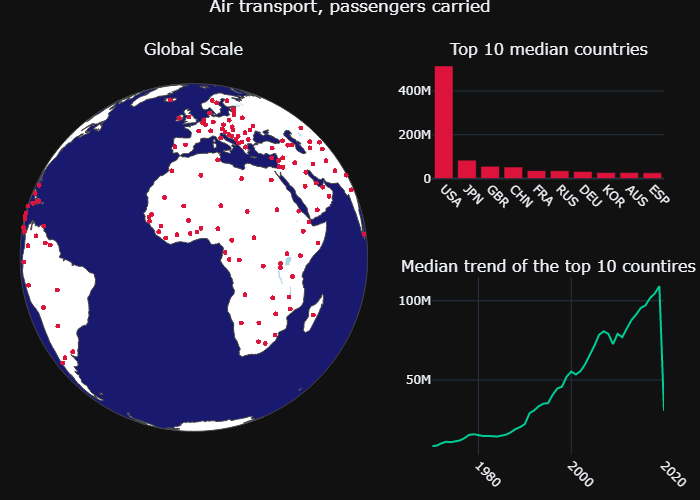

In [18]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)